In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vietnamese-diacritics-dataset/ViDiacritics_val.csv
/kaggle/input/vietnamese-diacritics-dataset/ViDiacritics_train.csv
/kaggle/input/vietnamese-diacritics-dataset/ViDiacritics_test.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import unicodedata
from collections import Counter

In [3]:
# Load tất cả các tập dữ liệu
datasets = {
    'Train': pd.read_csv("/kaggle/input/vietnamese-diacritics-dataset/ViDiacritics_train.csv"),
    'Validation': pd.read_csv("/kaggle/input/vietnamese-diacritics-dataset/ViDiacritics_val.csv"),
    'Test': pd.read_csv("/kaggle/input/vietnamese-diacritics-dataset/ViDiacritics_test.csv")
}

In [4]:
# Hàm tính độ dài và số dấu
def count_diacritics(text):
    return sum(1 for c in text if any(unicodedata.combining(x) for x in unicodedata.normalize("NFD", c)))

def extract_diacritic_chars(text):
    return [c for c in text if any(unicodedata.combining(x) for x in unicodedata.normalize("NFD", c))]

In [5]:
summary_stats = []
all_diacritics = []

for name, df in datasets.items():
    print(f"=== {name.upper()} SET ===")
    print(f"Số mẫu: {df.shape[0]}, Số cột: {df.shape[1]}")
    print("\nThông tin cột:")
    print(df.dtypes)
    print("\nThiếu dữ liệu:")
    print(df.isnull().sum())

    df['len_with_diacritics'] = df['with_diacritics'].astype(str).apply(len)
    df['len_no_diacritics'] = df['no_diacritics'].astype(str).apply(len)
    df['num_diacritics'] = df['with_diacritics'].astype(str).apply(count_diacritics)

    print("\nMô tả độ dài câu (with diacritics):")
    print(df['len_with_diacritics'].describe())
    print("\nMô tả số dấu mỗi câu:")
    print(df['num_diacritics'].describe())

    summary_stats.append({
        'Set': name,
        'Samples': df.shape[0],
        'Mean Length': df['len_with_diacritics'].mean(),
        'Mean Diacritics': df['num_diacritics'].mean(),
        'Median Length': df['len_with_diacritics'].median(),
        'Median Diacritics': df['num_diacritics'].median()
    })

    # Gom các ký tự có dấu
    chars = df['with_diacritics'].astype(str).apply(extract_diacritic_chars).explode().dropna().tolist()
    all_diacritics.extend(chars)

# Tổng hợp thống kê bảng
stats_df = pd.DataFrame(summary_stats)
print("\n=== Tổng quan các tập ===")
print(stats_df)

=== TRAIN SET ===
Số mẫu: 10039717, Số cột: 2

Thông tin cột:
no_diacritics      object
with_diacritics    object
dtype: object

Thiếu dữ liệu:
no_diacritics      0
with_diacritics    0
dtype: int64

Mô tả độ dài câu (with diacritics):
count    1.003972e+07
mean     7.153041e+01
std      6.667527e+01
min      1.000000e+00
25%      4.100000e+01
50%      5.200000e+01
75%      7.000000e+01
max      6.676000e+03
Name: len_with_diacritics, dtype: float64

Mô tả số dấu mỗi câu:
count    1.003972e+07
mean     1.284287e+01
std      1.239705e+01
min      0.000000e+00
25%      7.000000e+00
50%      9.000000e+00
75%      1.300000e+01
max      7.080000e+02
Name: num_diacritics, dtype: float64
=== VALIDATION SET ===
Số mẫu: 1254965, Số cột: 2

Thông tin cột:
no_diacritics      object
with_diacritics    object
dtype: object

Thiếu dữ liệu:
no_diacritics      0
with_diacritics    0
dtype: int64

Mô tả độ dài câu (with diacritics):
count    1.254965e+06
mean     7.149293e+01
std      6.615145e+01
min 

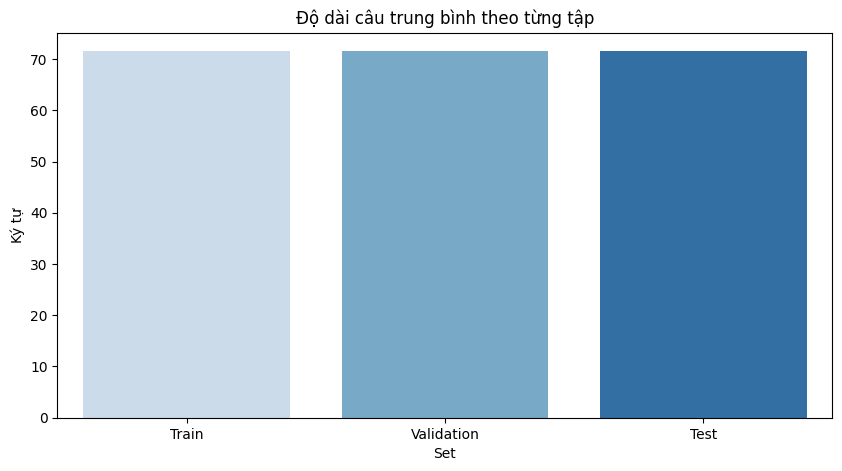

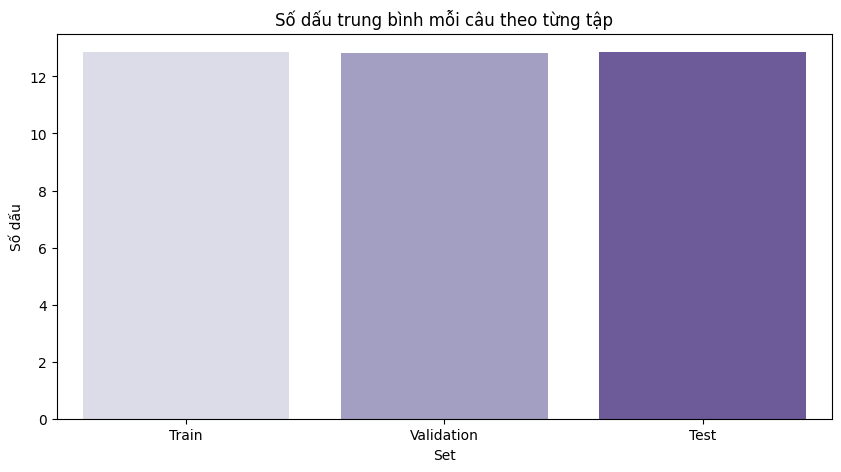

In [6]:
# Biểu đồ so sánh độ dài trung bình và số dấu
plt.figure(figsize=(10,5))
sns.barplot(data=stats_df, x='Set', y='Mean Length', palette='Blues')
plt.title("Độ dài câu trung bình theo từng tập")
plt.ylabel("Ký tự")
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(data=stats_df, x='Set', y='Mean Diacritics', palette='Purples')
plt.title("Số dấu trung bình mỗi câu theo từng tập")
plt.ylabel("Số dấu")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


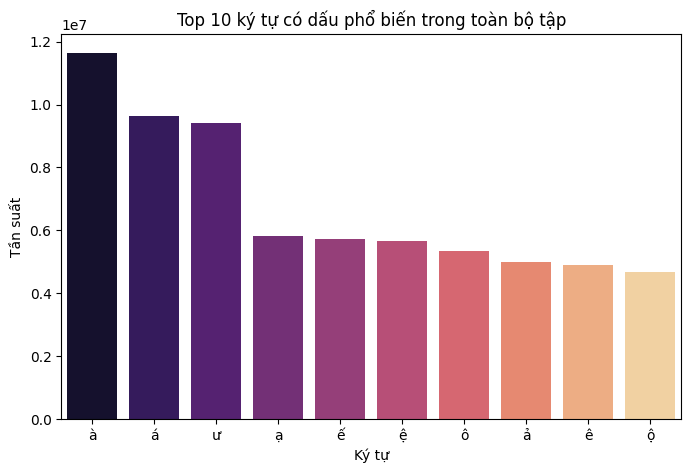

In [8]:
# Phân tích top ký tự có dấu
top_chars = Counter(all_diacritics).most_common(10)
labels, values = zip(*top_chars)
plt.figure(figsize=(8,5))
sns.barplot(x=list(labels), y=list(values), palette="magma")
plt.title("Top 10 ký tự có dấu phổ biến trong toàn bộ tập")
plt.xlabel("Ký tự")
plt.ylabel("Tần suất")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


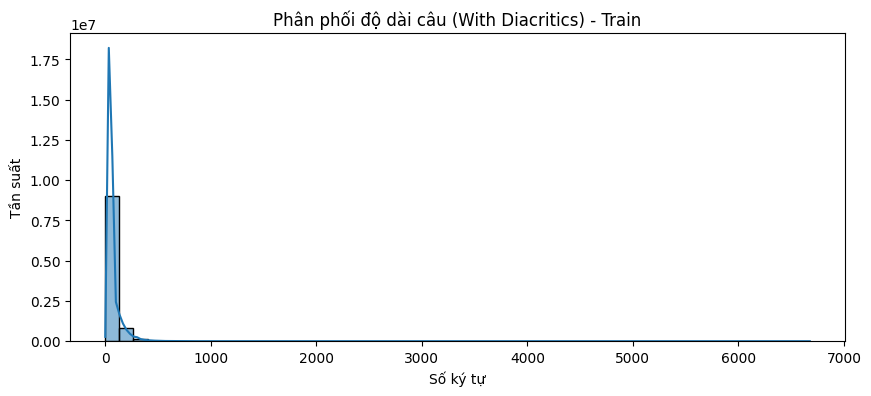

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


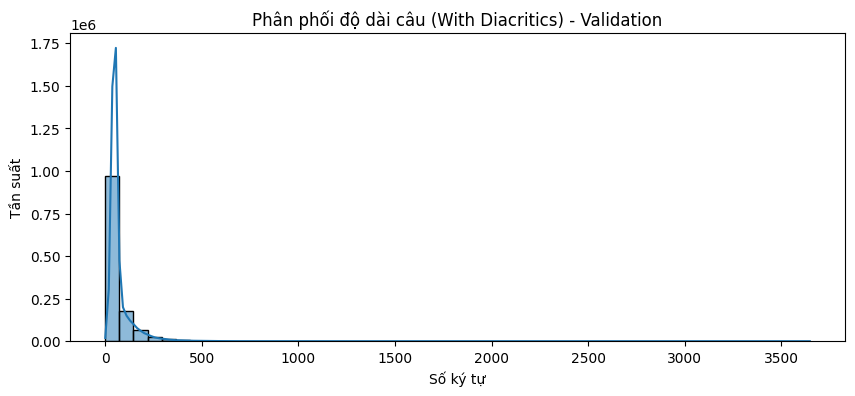

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


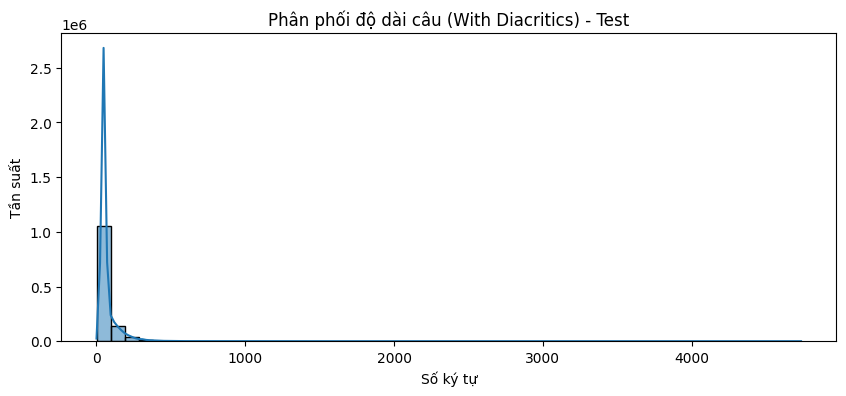

In [9]:
# Phân phối độ dài câu trong từng tập
for name, df in datasets.items():
    plt.figure(figsize=(10,4))
    sns.histplot(df['len_with_diacritics'], bins=50, kde=True)
    plt.title(f"Phân phối độ dài câu (With Diacritics) - {name}")
    plt.xlabel("Số ký tự")
    plt.ylabel("Tần suất")
    plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


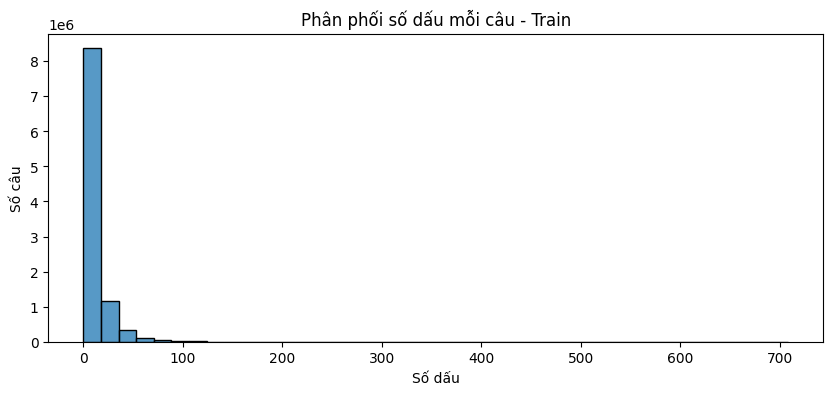

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


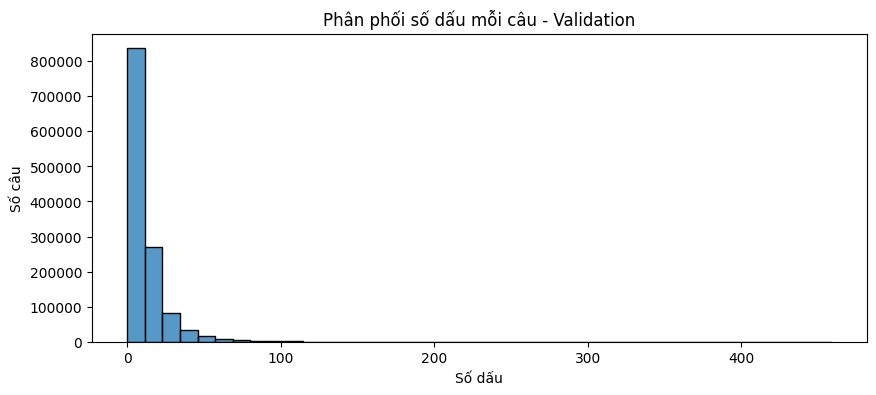

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


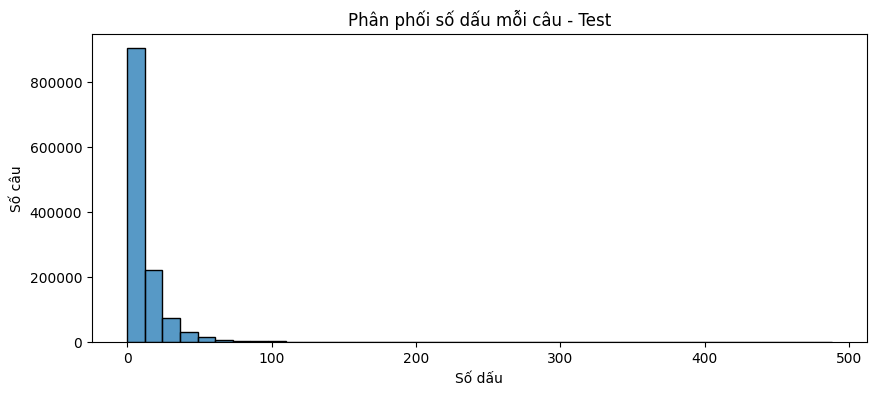

In [10]:
# Phân phối số dấu mỗi câu theo tập
for name, df in datasets.items():
    plt.figure(figsize=(10,4))
    sns.histplot(df['num_diacritics'], bins=40, kde=False)
    plt.title(f"Phân phối số dấu mỗi câu - {name}")
    plt.xlabel("Số dấu")
    plt.ylabel("Số câu")
    plt.show()